# The Influence Prosper Loan Variables on Borrower APRs
## by Jeffrey Van Anderson

## Investigation Overview

Through the exploration of loan data by Prosper, the goal here is to find out what variables influenced Borrower APR.  Although there are many variables to choose from, a small peak into just a few is quite insightful.

## Dataset Overview

The data set used here is an isolated selection from a database containing 113,937 observations and 81 variables.  For this brief report, five quantitative variables including Borrower APR and five qualitative variables were isolated for analysis as follows:

Quantitative Variables: `BorrowerAPR`, `LoanOriginalAmount`, `DebtToIncomeRatio`, `DelinquenciesLast7Years`, `AmountDelinquent`

Qualitative Variables: `Term`, `IncomeRange`, `EmploymentStatus`, `ListingCategory`, `IsBorrowerHomeowner`

Additionally, only rows with complete data were included.  The resulting data set contains 97,905 observations.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [3]:
#create list of collumns to keep for analysis
cols_to_keep = ['ListingKey', 'BorrowerAPR', 'Term', 'IncomeRange', 'EmploymentStatus',
                'LoanOriginalAmount', 'DebtToIncomeRatio', 'ListingCategory (numeric)', 
                'IsBorrowerHomeowner', 'DelinquenciesLast7Years', 'AmountDelinquent']

#assign queried collumns as df_trimmed variable
df_trimmed = df[cols_to_keep]

In [4]:
#remove ' (numeric)' string from `ListingCategory`
df_trimmed = df_trimmed.rename(index=str, columns={"ListingCategory (numeric)": "ListingCategory"})

In [5]:
#create list of columns with nulls
nulls_todrop = ['EmploymentStatus', 'DebtToIncomeRatio',
                'DelinquenciesLast7Years', 'AmountDelinquent']

#drop row observations where there are nulls in each specified column
for col in nulls_todrop:
    df_trimmed = df_trimmed[df_trimmed[col].notnull()]

In [6]:
#create dictionary of desired orders for each category
cat_dict = {'Term' : [12, 36, 60],
            'IncomeRange' : ['Not employed', 'Not displayed', '$1-24,999', '$25,000-49,999',
                             '$50,000-74,999', '$75,000-99,999', '$100,000+']}

#loop over two dictionary variables and apply each ordered list to categorical Dtype
for col in cat_dict:
    order = pd.api.types.CategoricalDtype(ordered = True, categories = cat_dict[col])
    df_trimmed[col] = df_trimmed[col].astype(order)

In [7]:
#change bool data to string for categorical analysis
df_trimmed['IsBorrowerHomeowner'] = df_trimmed['IsBorrowerHomeowner'].astype('str')

In [8]:
#change `ListingCategory` from integer to category string
#first change dtype to string for iteration
df_trimmed['ListingCategory'] = df_trimmed['ListingCategory'].astype('str')

#assign dictionary of category name to number
cat_dict = {'0' : 'Not Available',
            '1' : 'Debt Consolidation',
            '2' : 'Home Improvement', 
            '3' : 'Business',
            '4' : 'Personal Loan',
            '5' : 'Student Use',
            '6' : 'Auto', 
            '7' : 'Other',
            '8' : 'Baby&Adoption',
            '9' : 'Boat',
            '10' : 'Cosmetic Procedure',
            '11' : 'Engagement Ring',
            '12' : 'Green Loans',
            '13' : 'Household Expenses', 
            '14' : 'Large Purchases',
            '15' : 'Medical/Dental',
            '16' : 'Motorcycle',
            '17' : 'RV',
            '18' : 'Taxes',
            '19' : 'Vacation',
            '20' : 'Wedding Loans'}

#loop over column and replace numbers with category strings
for num, string in cat_dict.items():
    df_trimmed['ListingCategory'] = df_trimmed['ListingCategory'].replace(num, string)

In [9]:
#replace zeroes with NaN values in the three specified columns
del_cols = ['AmountDelinquent', 'DelinquenciesLast7Years']
df_trimmed[del_cols] = df_trimmed[del_cols].replace({0 : np.nan})

## Distribution of Borrower APR's for Prosper loans. 

The distribution of Borrower APR's is a bit intriguing at a glance.  With almost all loans between a 5% and 40% APR, one might expect some kind of normal distribution; however, this is not even close to the case.  There are many high points at different rates which likely are the result of lurking variables.  Of most striking note is the amount of loans that are concentrated at and just above 35% APR.  When viewing these values in a histogram, the highest count it at this unusually high percentage. 

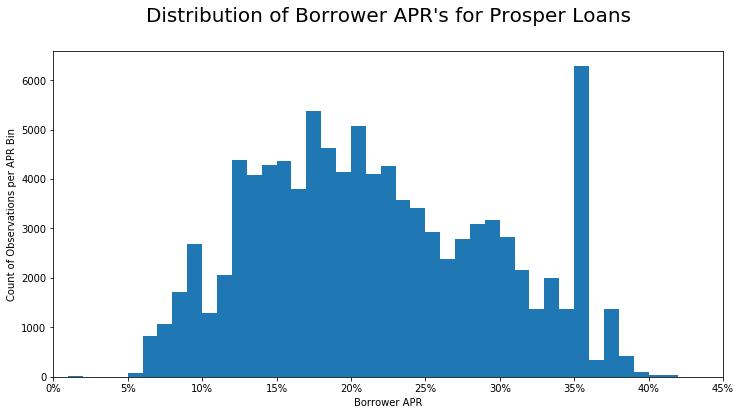

In [10]:
#Creates an array of bins at a specified binsize for histogram
binsize = 0.01 
bins = np.arange(0, df_trimmed['BorrowerAPR'].max() + binsize, binsize)
ticks = np.arange(0, df_trimmed['BorrowerAPR'].max() + 0.05, 0.05)
tick_names = ['{}%'.format(int(i*100)) for i in ticks]

#plots a histogram of `BorrowerAPR`
plt.figure(figsize=(12,6))
plt.hist(data = df_trimmed, x = 'BorrowerAPR', bins = bins)
plt.xlim([0, 0.45])
plt.xticks(ticks, tick_names)
plt.title("Distribution of Borrower APR's for Prosper Loans",
          fontsize=20, y=1.07)
plt.xlabel('Borrower APR')
plt.ylabel('Count of Observations per APR Bin');

In [11]:
#assign quantitative and qualitative variables to separate lists for easy coding
cat_vars = ['Term', 'IncomeRange', 'EmploymentStatus', 'ListingCategory', 'IsBorrowerHomeowner']
quant_vars = ['BorrowerAPR', 'LoanOriginalAmount', 'DebtToIncomeRatio',
              'DelinquenciesLast7Years', 'AmountDelinquent']

## Correlation of Quantitative Variables for Prosper Loans

When all five quantitative variables in this data set are compared in a heatmap matrix, there is dissappointingly no significant correlations of note.  Even the correlation coefficient between `BorrowerAPR` and `LoanOriginalAmount` is only -0.34. Perhaps there would be if certain qualitative properties were isolated.   

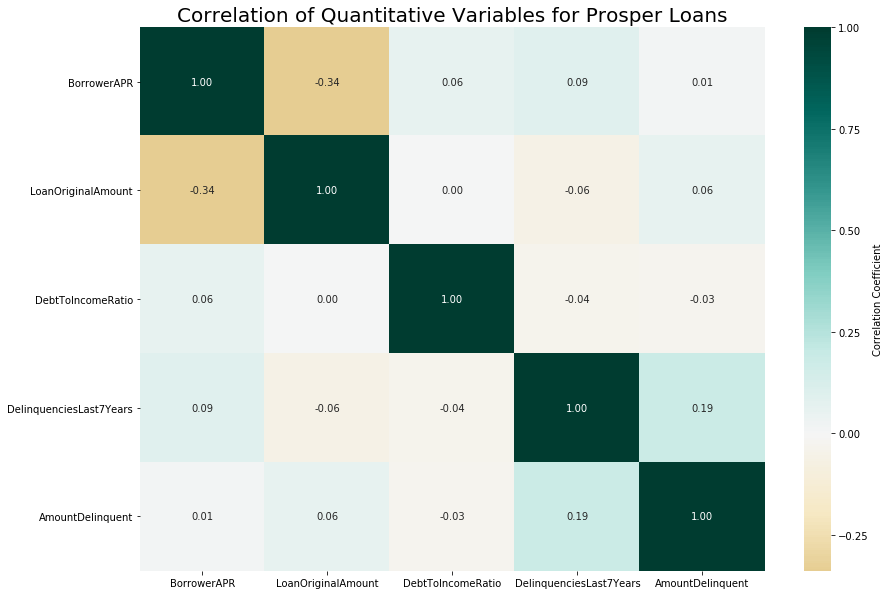

In [12]:
#displays heatmap of five quantitative variables for more accurate view of correlation coefficients
plt.figure(figsize = [14, 10])
sns.heatmap(df_trimmed[quant_vars].corr(), annot = True, fmt = '.2f',
            cmap = 'BrBG', center = 0, cbar_kws = {'label' : 'Correlation Coefficient'})
plt.title('Correlation of Quantitative Variables for Prosper Loans',
          fontsize=20);

## Comparison of Borrower APR Distributions by Income Range

After rigorous investigation, there appears to be an interesting negative correlation between median borrower APR and income range category.  In tandem, there appears to be a larger concentration of the 35% APR loans observed in lower Income Ranges.  It would be interesting to see how much of the median APR is effected by this specific high APR loan type and how much is a true negative correlation.


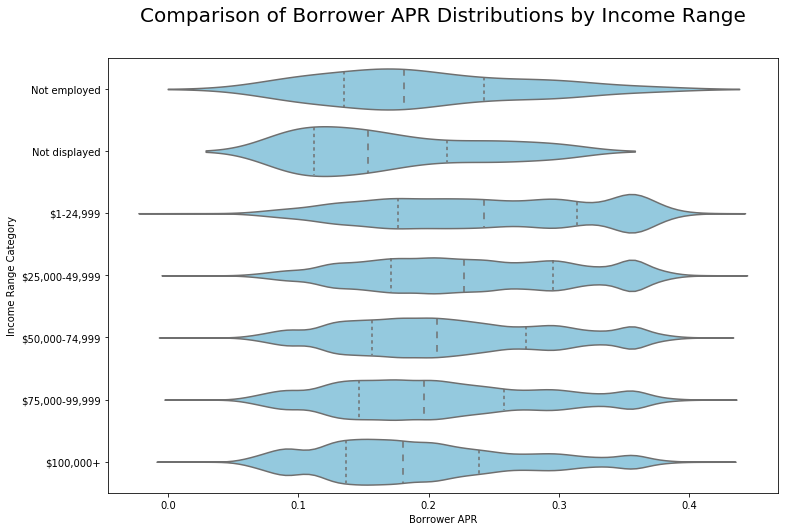

In [13]:
#Displays violinplots of BorrowerAPR by ListingCategory
plt.figure(figsize = (12,8))
sns.violinplot(data = df_trimmed, x = 'BorrowerAPR', y = 'IncomeRange',
               color = 'skyblue', inner = 'quartile')
plt.title('Comparison of Borrower APR Distributions by Income Range',
          fontsize=20, y=1.07)
plt.ylabel('Income Range Category')
plt.xlabel('Borrower APR');

In [14]:
#create two separate dataframe variables queried by other and 36 month Term derations
other_durations = df_trimmed.query("Term == 12 or Term == 60")
three_years = df_trimmed.query("Term == 36")


## Comparison od APR Distributions by Term Length

Another notable variable that appears to be associated with a high quantity of 35% APR loans is Term length.  When the distributions of all other loan term lengths are compared with 36 month terms, there is a clear difference.  36 month loans have a much higher density of observations for APR's around 35%.  This quality warrents further investigation and perhaps a multivariate comparison with other variables and specifically, Income Range.    


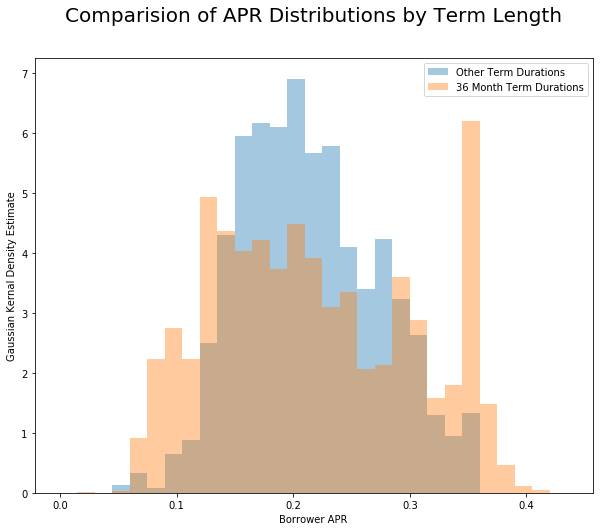

In [15]:
#set bin size and edges for histograms
binsize = 0.015 
bins = np.arange(0, df_trimmed['BorrowerAPR'].max() + binsize, binsize)

#plot overlapping histograms of the BorrowerAPR base on queried categories
plt.figure(figsize=(10, 8))
sns.distplot(other_durations['BorrowerAPR'], bins = bins,
             norm_hist = True, kde = False, label = 'Other Term Durations')
sns.distplot(three_years['BorrowerAPR'], bins = bins,
             norm_hist = True, kde = False, label = '36 Month Term Durations')

#format title, legend, axes and text
plt.title('Comparision of APR Distributions by Term Length', fontsize=20, y =1.07)
plt.ylabel('Gaussian Kernal Density Estimate')
plt.xlabel('Borrower APR')
plt.legend()
plt.show();

In [16]:
#create a index object variable of `ListingCategory` values
List_cats = df_trimmed['ListingCategory'].value_counts().index

#remove 'Debt Consolidation' from index object
List_cats = List_cats.drop('Debt Consolidation')

#loop over `ListingCategory` column and replace values with other
for string in List_cats:
    df_trimmed['ListingCategory'].replace({string : 'other'}, inplace =True)

In [17]:
def catmodes(cat_var_l, cat_var_2):
    '''
    Takes two categorical variable inputs that are column variables of df_trimmed.  
    The BorrowerAPR collumn values are then grouped by the two inputed categorical
    variables by mode.
    '''
    #assigns mode APR of grouped variables to cat_modes
    mode = lambda x:x.value_counts().index[0]
    cat_modes = df_trimmed.groupby([cat_var_l, cat_var_2])['BorrowerAPR'].agg(mode)
    cat_modes = cat_modes.reset_index(name = 'mode')
    cat_modes = cat_modes.pivot(index = cat_var_l, columns = cat_var_2, values = 'mode')
    return cat_modes

def catmeans(cat_var_l, cat_var_2):
    '''
    Takes two categorical variable inputs that are column variables of df_trimmed.  
    The BorrowerAPR collumn values are then grouped by the two inputed categorical
    variables by mean.
    '''
    #assigns mean APR of grouped variables to cat_means
    cat_means = df_trimmed.groupby([cat_var_l, cat_var_2]).mean()['BorrowerAPR']
    cat_means = cat_means.reset_index(name = 'mean')
    cat_means = cat_means.pivot(index = cat_var_l, columns = cat_var_2, values = 'mean')
    return cat_means

## Borrower APR by Term Compared to Two Qualitative Variables

When the mode or most common APR value for these data is compared across qualitative variables, 35.8% APR value clearly stands out for some categories more than others.  Two interesting effects are in the case of twelve month terms.  Apparently, the high interest 35.8% APR 12 month loans are more common for debt consolidation and borrowers who are not homeowners.  Even more surprising is how low the mode 12 month interest rate is for homeowners and non-debt consolidation.

However, this should be taken with a grain of salt, measurements of center (mean, median, mode) can be notoriously misleading.

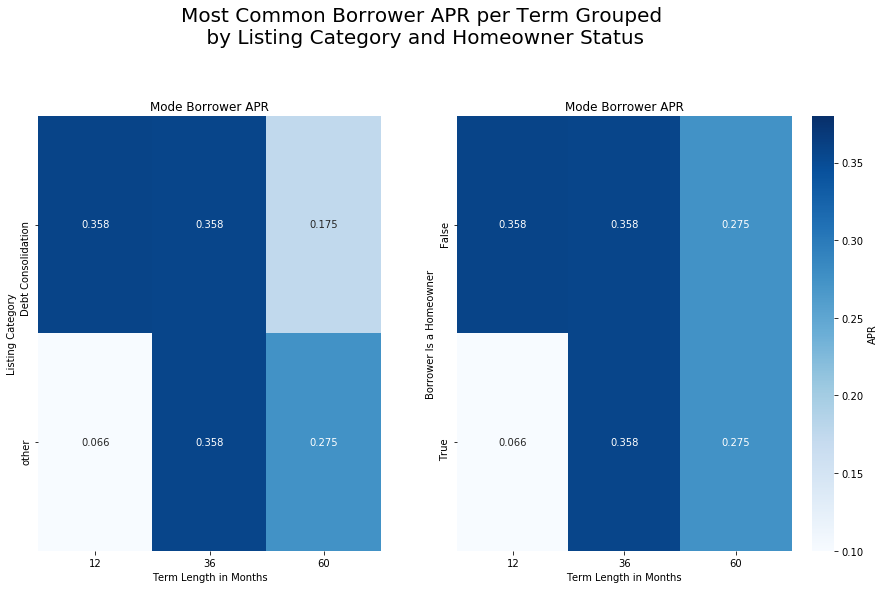

In [18]:
#creates two sublotted heat maps side by side via the variables ax1 and ax2
fig, ax = plt.subplots(ncols=2, figsize=(15,8), gridspec_kw={'width_ratios': [1, 1.22]})
ax1 = sns.heatmap(catmodes('ListingCategory', 'Term'),
                    annot = True, fmt = '.3f',
                    cbar = False,
                    cmap = 'Blues', vmin=0.1, vmax=0.38, ax = ax[0])
ax2 = sns.heatmap(catmodes('IsBorrowerHomeowner', 'Term'),
                    annot = True, fmt = '.3f',
                    cbar_kws = {'label' : 'APR'},
                    cmap = 'Blues', vmin=0.1, vmax=0.38, ax = ax[1])

#tweeks the format and text of the subplots and figure
plt.subplots_adjust(wspace = 0.2)
ax1.title.set_text('Mode Borrower APR')
ax1.set_ylabel('Listing Category')
ax1.set_xlabel('Term Length in Months')
ax2.title.set_text('Mode Borrower APR')
ax2.set_ylabel('Borrower Is a Homeowner')
ax2.set_xlabel('Term Length in Months')
fig.suptitle('Most Common Borrower APR per Term Grouped\n by Listing Category and Homeowner Status',
             fontsize=20, x=0.48, y =1.07);

## Comparison of Most Common Interest Rates By Income Range and Term Length

Finally, the Income Range and Term Length are compared by mean and mode APR.  The resulting visualization suggests that the high mode or most common APR for 12 month terms is concentrated on the three lowest income categories.  This is coupled by an extremely low mode income rate for high income categories.  

Another point of insight is that the mean APR for 60 month terms still appears to have a negative correlation with income range even without a mode APR of 35.8%.  This Suggests that even though there is a misleading frequent occurrence of 35.8% APR loans, there is still a negative relationship between income and borrower APR.

Once again, gaining insight from measurements of center should be taken cautiously.



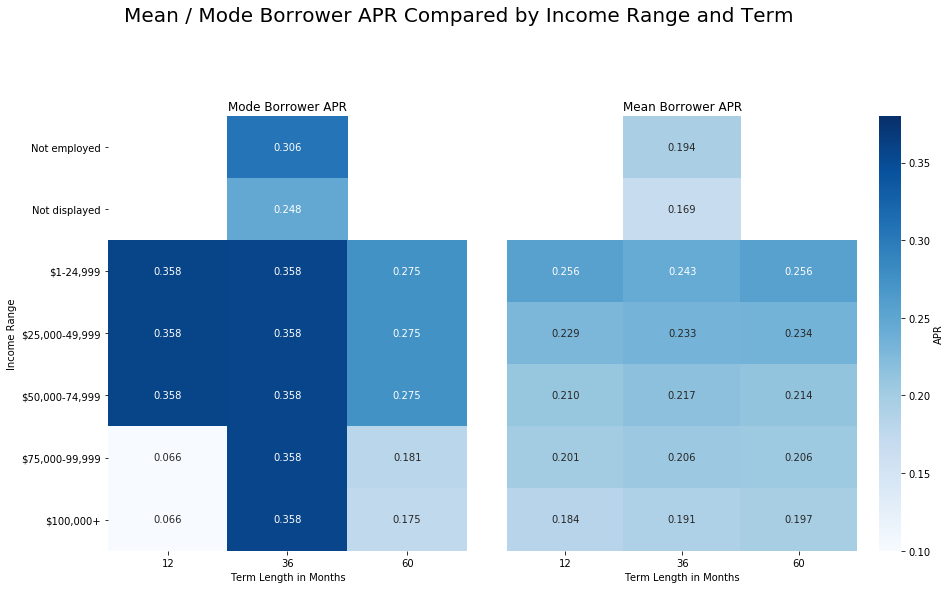

In [19]:
#creates two sublotted heat maps side by side via the variables ax1 and ax2
fig, ax = plt.subplots(ncols=2, figsize=(15,8), gridspec_kw={'width_ratios': [1, 1.22]})
ax1 = sns.heatmap(catmodes('IncomeRange', 'Term'),
                  annot = True, fmt = '.3f',
                  cbar = False,
                  cmap = 'Blues', vmin=0.1, vmax=0.38, ax = ax[0])
ax2 = sns.heatmap(catmeans('IncomeRange', 'Term'),
                  annot = True, fmt = '.3f',
                  cbar_kws = {'label' : 'APR'},
                  cmap = 'Blues', vmin=0.1, vmax=0.38, ax = ax[1])

#tweeks the format and text of the subplots and figure
plt.subplots_adjust(wspace = 0.1)
ax1.title.set_text('Mode Borrower APR')
ax1.set_ylabel('Income Range')
ax1.set_xlabel('Term Length in Months')
ax2.title.set_text('Mean Borrower APR')
ax2.set_yticks([])
ax2.set_ylabel('')
ax2.set_xlabel('Term Length in Months')
fig.suptitle('Mean / Mode Borrower APR Compared by Income Range and Term', fontsize=20, x=0.45, y =1.07);
